Second step is analysis & visualization of data edited by SMOTE

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df= pd.read_csv('migraine_balanced_cleaned2.csv')
df.describe()

,index,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,...,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,...,700.0,700.000000,700.000000,700.000000,700.000000,700.00000,700.0,700.000000,700.000000,700.000000
mean,349.50000,29.131429,1.487143,1.932857,0.900000,0.918571,2.200000,0.931429,0.198571,0.884286,...,0.0,0.197143,0.071429,0.005714,0.004286,0.01000,0.0,0.007143,0.002857,0.434286
std,202.21688,10.868568,0.685935,1.428228,0.419483,0.444902,1.076475,0.252905,0.399210,0.320111,...,0.0,0.398126,0.257724,0.075431,0.065372,0.09957,0.0,0.084273,0.053414,0.496017
min,0.00000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000
25%,174.75000,21.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000
50%,349.50000,25.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000
75%,524.25000,36.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,1.000000
max,699.00000,69.000000,3.000000,7.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,1.000000,1.000000,1.000000


In [17]:
df.head()

,index,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,0,37,1,1,1,1,3,1,0,1,...,0,0,0,0,0,0,0,0,0,Basilar-type aura
1,1,48,1,2,1,1,3,1,1,1,...,1,0,0,0,1,0,0,1,0,Basilar-type aura
2,2,38,1,1,1,1,3,1,0,1,...,0,0,0,0,0,0,1,0,1,Basilar-type aura
3,3,37,1,1,1,1,3,1,0,1,...,0,0,0,0,0,0,0,0,0,Basilar-type aura
4,4,36,1,1,1,1,3,1,0,1,...,1,0,0,0,0,0,1,0,0,Basilar-type aura


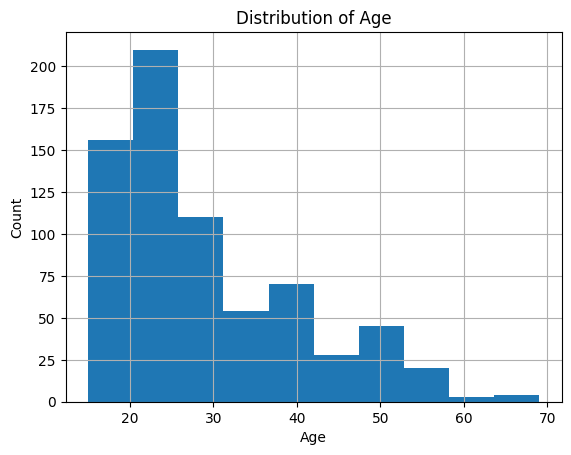

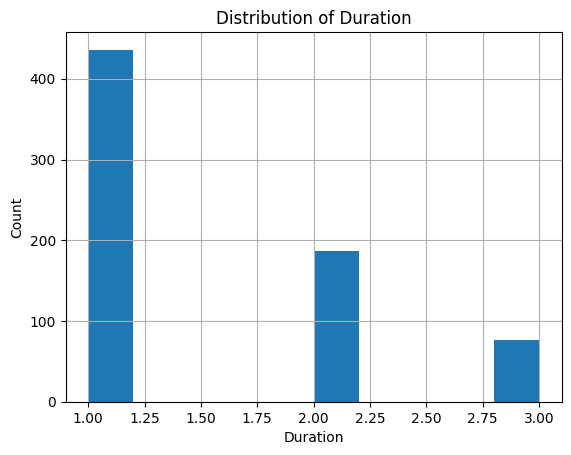

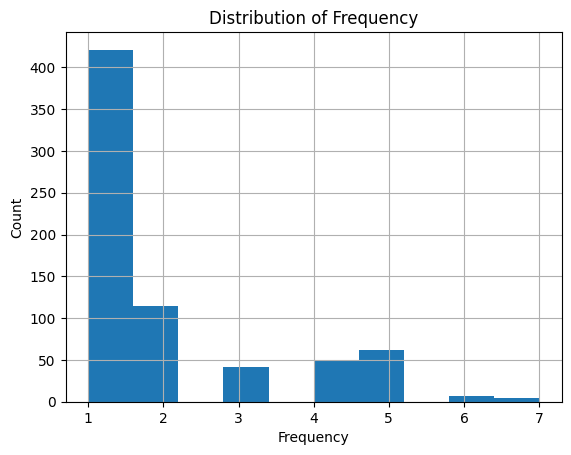

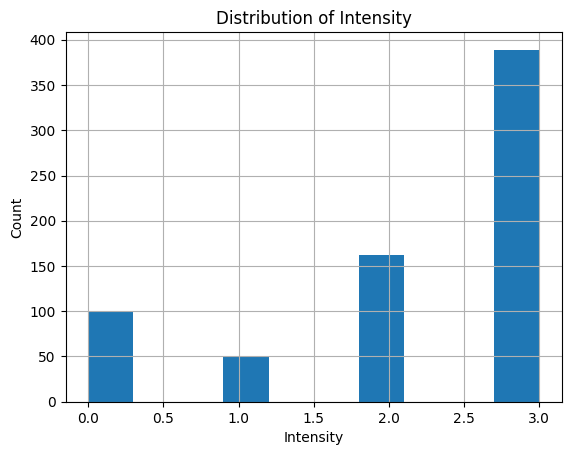

In [20]:
#Histograms for every numerical column 

for col in ["Age","Duration","Frequency","Intensity"]:
    plt.figure()
    df[col].hist()
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")



<Figure size 640x480 with 0 Axes>

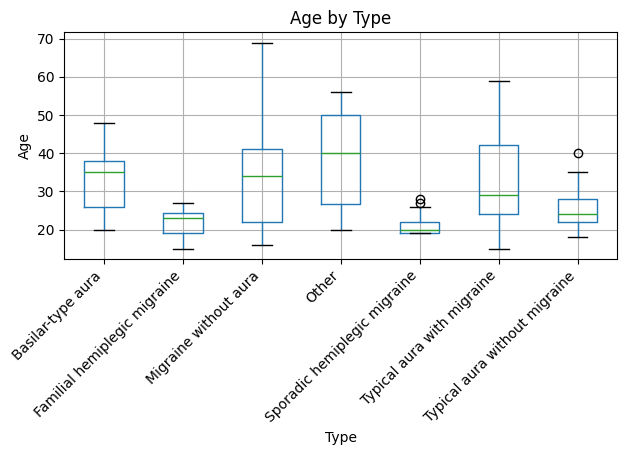

<Figure size 640x480 with 0 Axes>

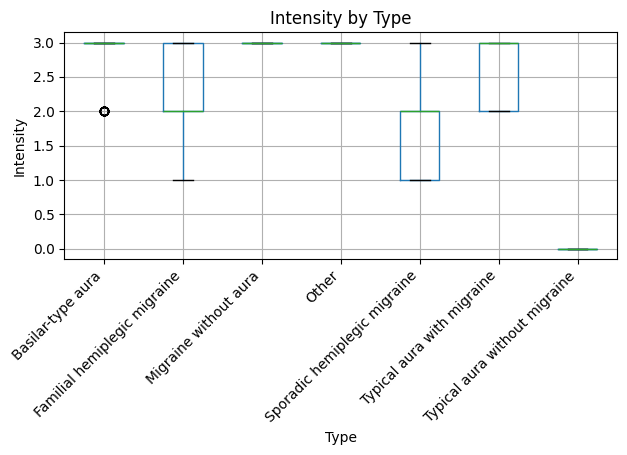

In [23]:
#Boxplots

cols = ["Age","Intensity"]
for col in cols:
    plt.figure()
    df.boxplot(column=col, by="Type")
    plt.title(f"{col} by Type")
    plt.suptitle("")
    plt.xlabel("Type")
    plt.ylabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Analysis Based on Boxplots:
### Age:
#### Basilar-type aura: Likely to happen for individuals in their late 20s to their late 30s.
#### Familial Hemiplegic Migraine: Likely for people in their early 20s.
#### Migraine without Aura: From early 20s to early 40s, most cases in mid 30s.
#### Sporadic Hemiplegic Migraine: Likely for early 20s, with some cases in late 20s.
#### Typical Aura with Migraine: From mid 20s to early 40s, most cases being close to 30s.
#### Typical Aura without Migraine: In their 20s.
#### Other Types are usually spread from late 20s to 50s.


### Intensity:
#### Familial Hemiplegic Migraine & Typical Aura with Migraine have proven to be with either middle or high intensity.
#### Sporadic Hemiplegic Migraine has low to middle intensity.
#### Naturally, Typical aura without migraine has no intensity.
#### Basilar-type aura, Migraine without Aura, and mostly every other type of headache are likely to have high intensity.

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,37,1,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Basilar-type aura
1,48,1,2,1,1,3,1,1,1,1,...,1,0,0,0,1,0,0,1,0,Basilar-type aura
2,38,1,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,1,0,1,Basilar-type aura
3,37,1,1,1,1,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Basilar-type aura
4,36,1,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,1,0,0,Basilar-type aura


In [37]:
#Ataxia and dysarthria are always 0
df=df.drop(['Ataxia','Dysarthria'],axis=1)

Text(0.5, 1.0, 'Correlation Heatmap of Features')

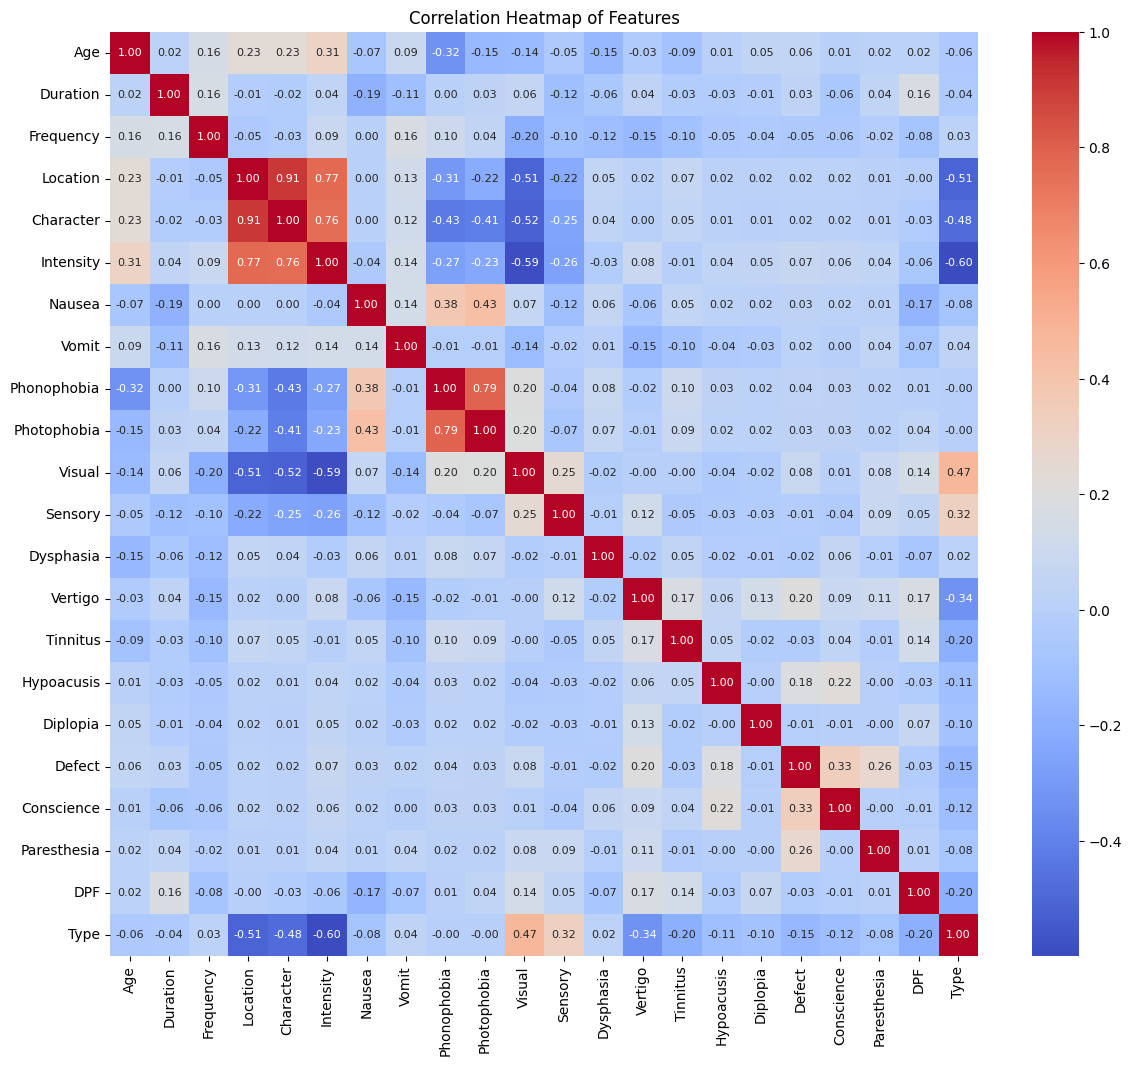

In [38]:
# Heatmap of correlations for every symptom and data
df_encoded = df.copy()
df_encoded['Type'] = df_encoded['Type'].astype('category').cat.codes
corr = df_encoded.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 8})
plt.title('Correlation Heatmap of Features')



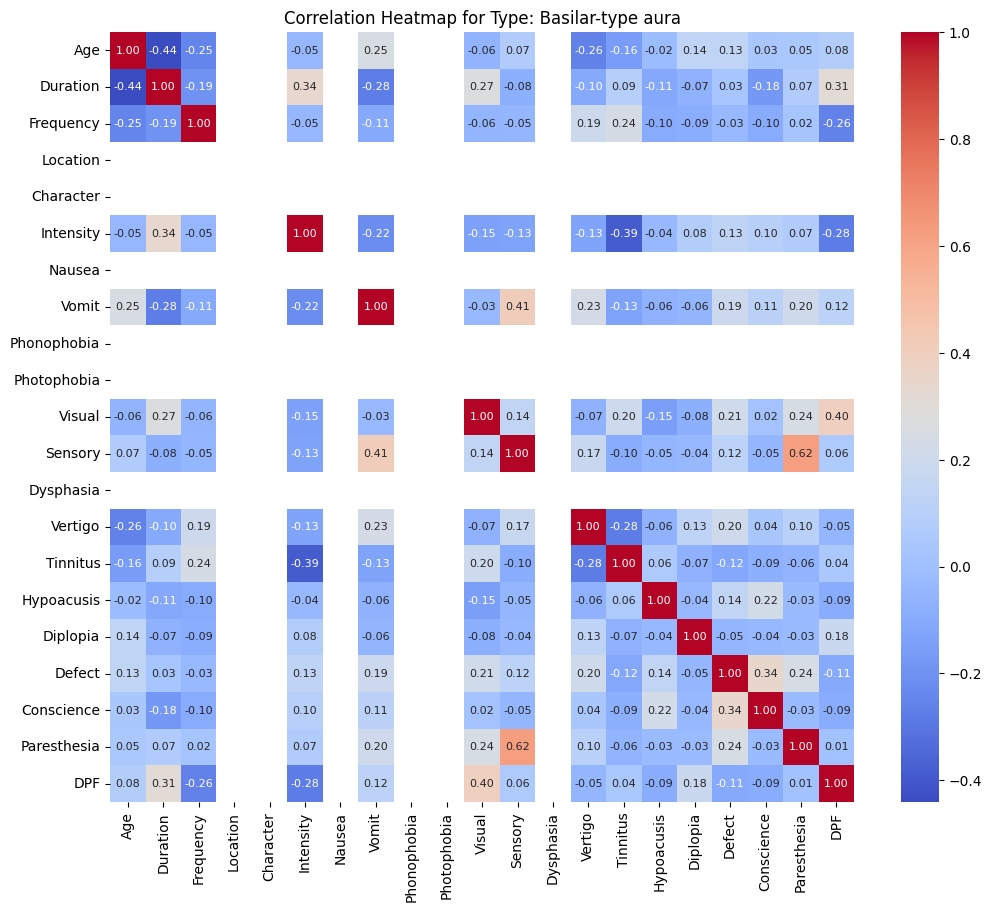

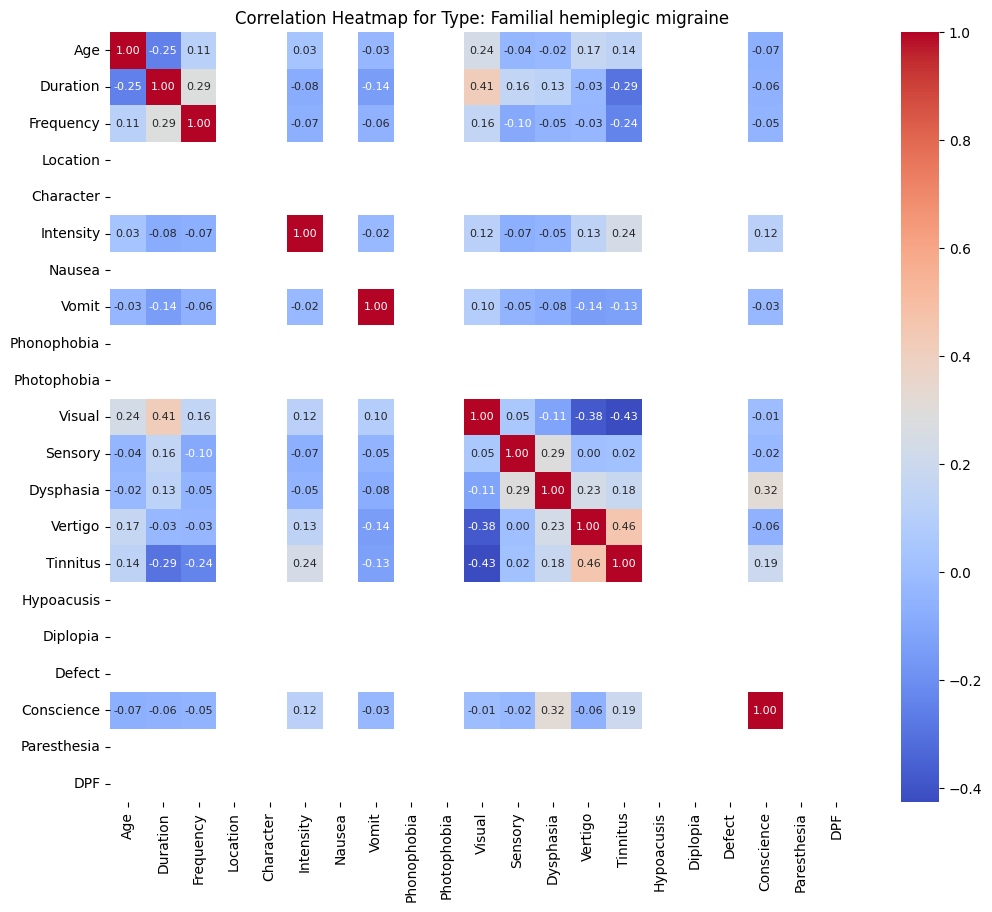

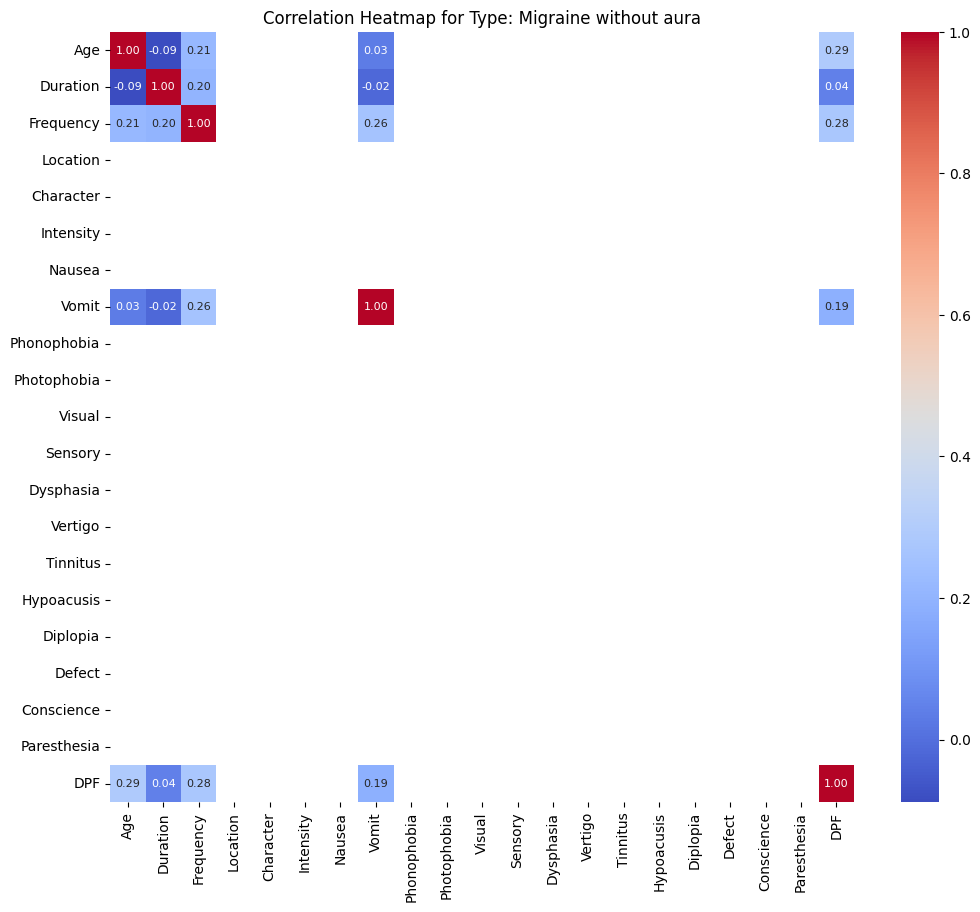

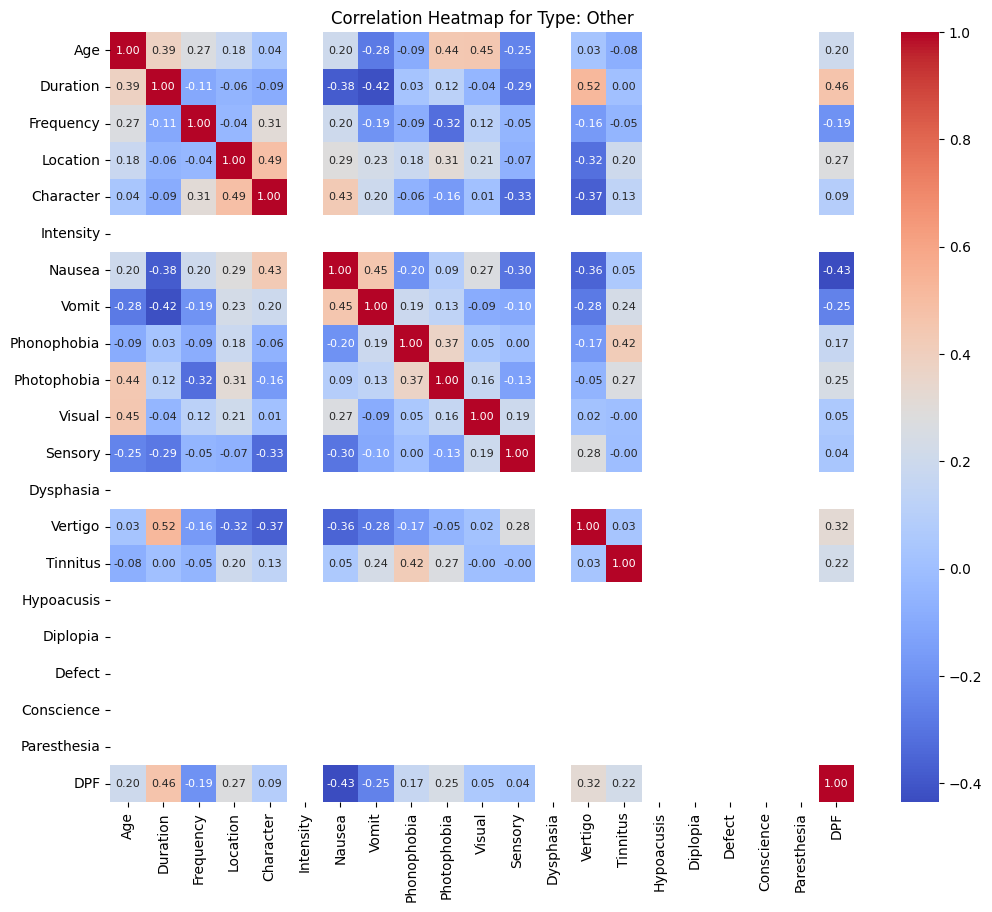

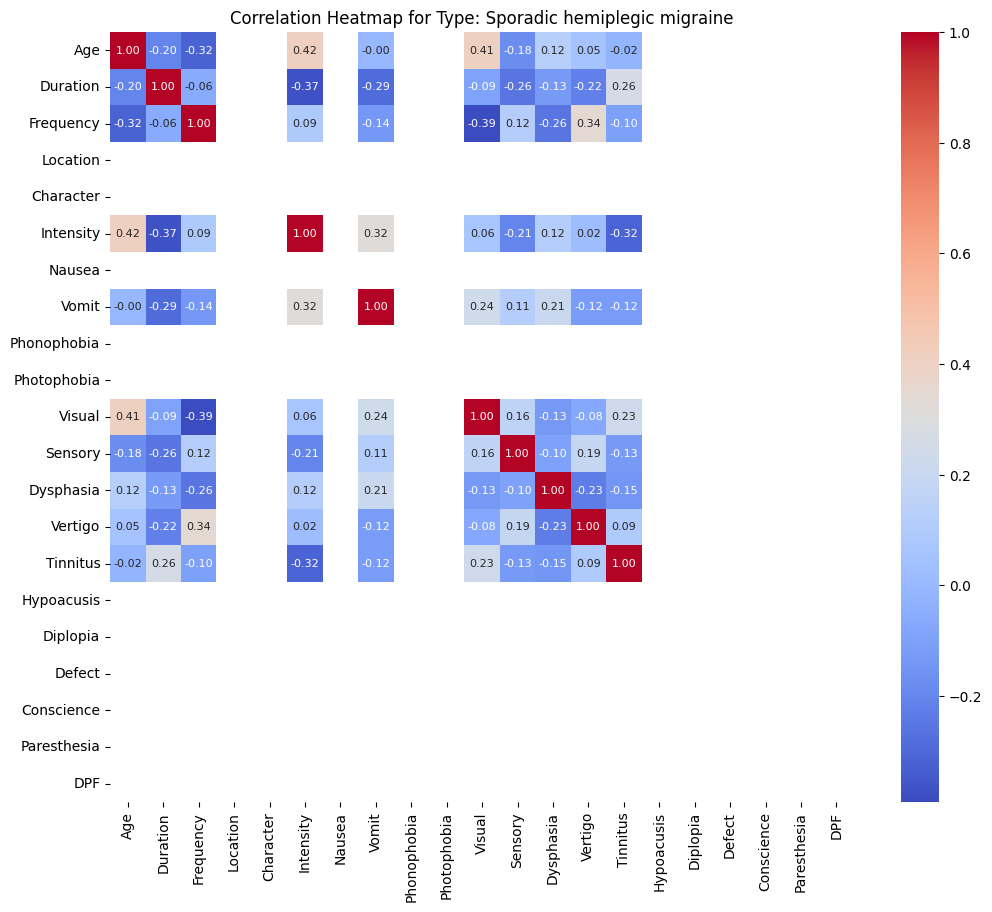

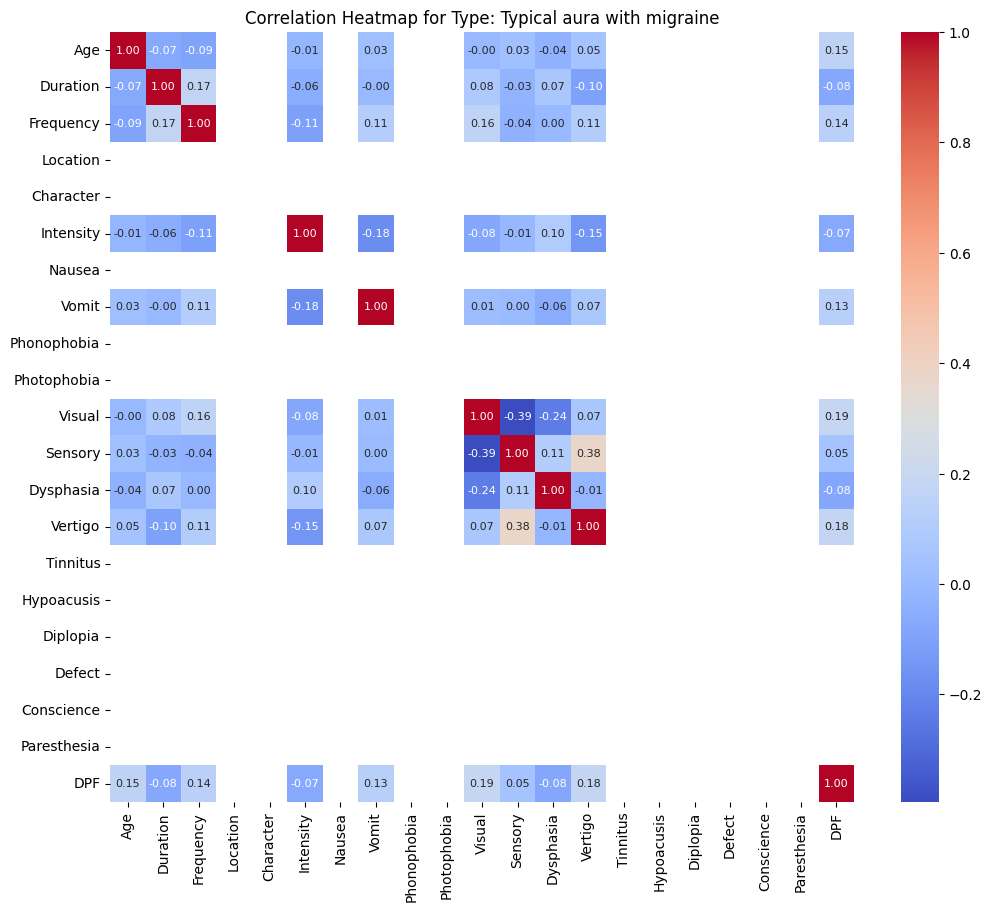

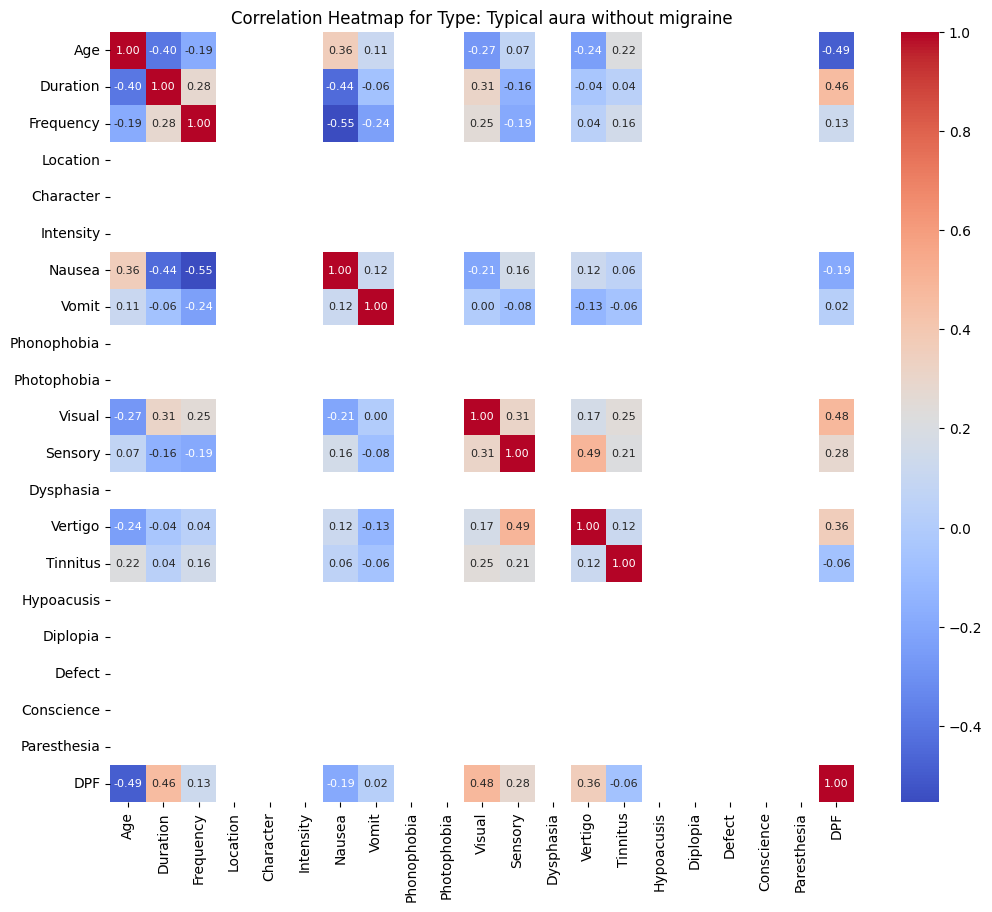

In [40]:
#Heatmaps for each type
types = df['Type'].unique()
for t in types:
    subset = df[df['Type'] == t].drop(columns=[ 'Type'])
    corr = subset.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8})
    plt.title(f'Correlation Heatmap for Type: {t}')
    plt.show()

## The previous heatmaps show point to important insights, as the symptoms that are marked 0 or 'No' for some headache types are marked with white.

In [41]:
df.to_csv('migraine_balanced_cleaned2.csv', index=False)
